In [1]:
import pandas as pd
# Auto-reload packages
%load_ext autoreload
%autoreload 2

In [47]:
import integratecnv as cnv
import numpy as np
import pandas as pd 

In [51]:
gene_annot_tab = "/Users/sitarapersad/Desktop/PDAC_CNV_Outputs/annotations.gtf.lifthg19.bed"
cna_dir = "/Users/sitarapersad/Desktop/PDAC_CNV_Outputs/data/Proj_06287_BD_CNA/facets/"

# This is what the gene annotation table looks like
pd.read_csv(gene_annot_tab, sep='\t', header=None).head()

,0,1,2,3,4,5
0,chr1,29554,31109,ENSG00000243485,MIR1302-2,+
1,chr1,34554,36081,ENSG00000237613,FAM138A,-
2,chr1,69091,70008,ENSG00000186092,OR4F5,+
3,chr1,89295,133723,ENSG00000238009,RP11-34P13.7,-
4,chr1,89551,91105,ENSG00000239945,RP11-34P13.8,-


In [49]:
cna_paths = cnv.prepare_regions.find_files(cna_dir, "_hisens.cncf.txt")
cna_paths = sorted(cna_paths)
print(f'Found {len(cna_paths)} CNA files.')
cna_paths[:2]

Found 11 CNA files.


['/Users/sitarapersad/Desktop/PDAC_CNV_Outputs/data/Proj_06287_BD_CNA/facets/s_RA19_10_3_s_RA19_10_11_1_facets/s_RA19_10_3_s_RA19_10_11_1_hisens.cncf.txt',
 '/Users/sitarapersad/Desktop/PDAC_CNV_Outputs/data/Proj_06287_BD_CNA/facets/s_RA19_10_3_s_RA19_10_12_1_facets/s_RA19_10_3_s_RA19_10_12_1_hisens.cncf.txt']

In [52]:
# This is what a hisens.cncf.txt file looks like
pd.read_csv(cna_paths[0], sep='\t').head()

,ID,chrom,loc.start,loc.end,seg,num.mark,nhet,cnlr.median,mafR,segclust,cnlr.median.clust,mafR.clust,cf,tcn,lcn,cf.em,tcn.em,lcn.em
0,s_RA19_10_3_s_RA19_10_11_1_hisens,1,13118,16817418,1,7873,1018,-0.209873,0.989991,14,-0.207923,1.047120,0.499609,2,0.0,0.487883,2,0.0
1,s_RA19_10_3_s_RA19_10_11_1_hisens,1,16817550,17323800,2,541,143,-0.205206,0.163277,15,-0.207923,0.163277,0.229586,2,0.0,1.000000,2,1.0
2,s_RA19_10_3_s_RA19_10_11_1_hisens,1,17326400,142690400,3,31056,2402,-0.207258,1.083585,14,-0.207923,1.047120,0.499609,2,0.0,0.487883,2,0.0
3,s_RA19_10_3_s_RA19_10_11_1_hisens,1,142692086,145281824,4,527,168,0.049063,0.095105,23,0.060280,0.089918,0.499609,3,1.0,0.284914,4,2.0
4,s_RA19_10_3_s_RA19_10_11_1_hisens,1,145282050,152080200,5,3298,267,0.313042,0.041000,33,0.321979,0.019340,0.332971,5,2.0,0.346493,5,2.0


# Determine regions that a candidates for harboring CNAs

In [50]:
# Determine regions that contain alterations from WGS data 
cna_alterations_bed_filtered = cnv.prepare_regions.get_altered_regions(cna_paths, gene_annot_tab, filter_inconsistent=True, gene_count_cutoff=20)
n_altered = cna_alterations_bed_filtered.shape[0]
print(f'Found {n_altered} altered regions.')

# Get genes that fall in altered and neutral regions  
cna_gene_map_alt = cnv.prepare_regions.map_gene_to_cna(cna_alterations_bed_filtered, gene_annot_tab)

Found 967 regions with copy number alterations across samples.
Filtered out 43 inconsistent regions.
Found 924 regions after filtering for consistent copy number alterations.
Found 924 regions with copy number alterations across samples.


BEDToolsError: 
Command was:

	bedtools intersect -a /var/folders/m5/c9fbkvps3xlbq5qznlx2n4h00000gn/T/tmpavluhraw.bed -wa -c -b /var/folders/m5/c9fbkvps3xlbq5qznlx2n4h00000gn/T/pybedtools.f7g2plgm.tmp

Error message was:
Error: unable to open file or unable to determine types for file /var/folders/m5/c9fbkvps3xlbq5qznlx2n4h00000gn/T/pybedtools.f7g2plgm.tmp

- Please ensure that your file is TAB delimited (e.g., cat -t FILE).
- Also ensure that your file has integer chromosome coordinates in the 
  expected columns (e.g., cols 2 and 3 for BED).


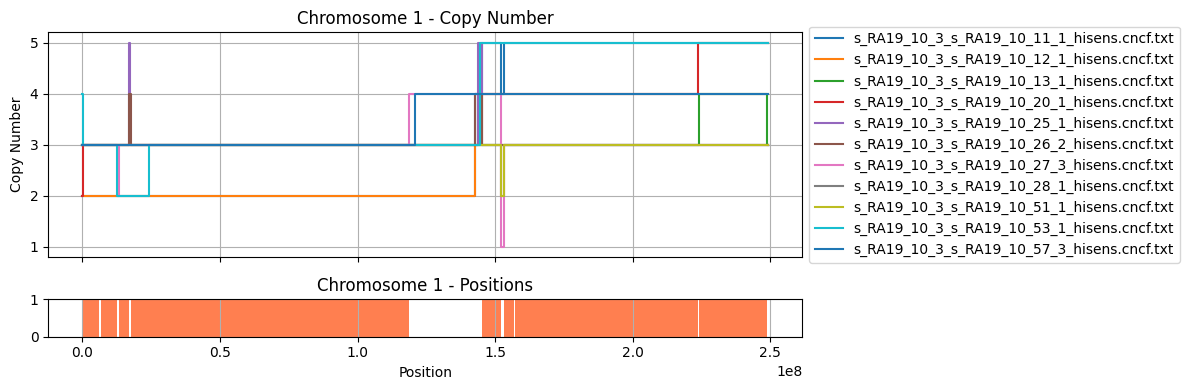

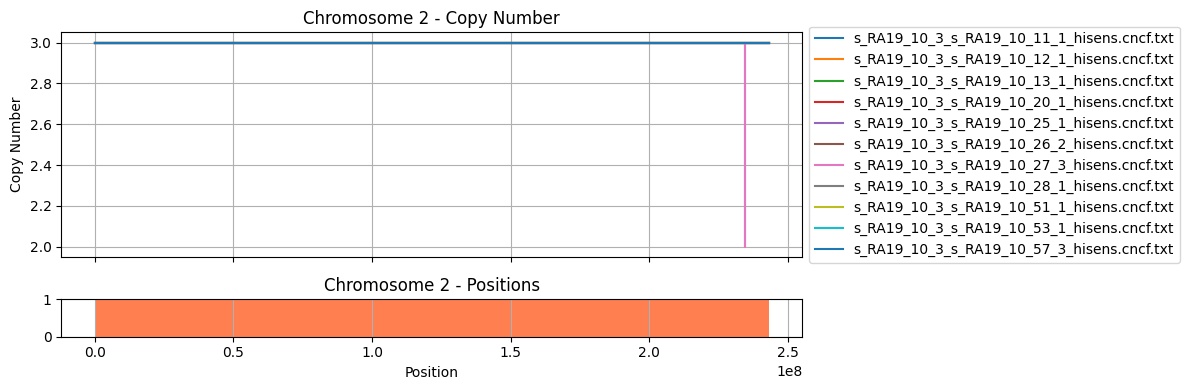

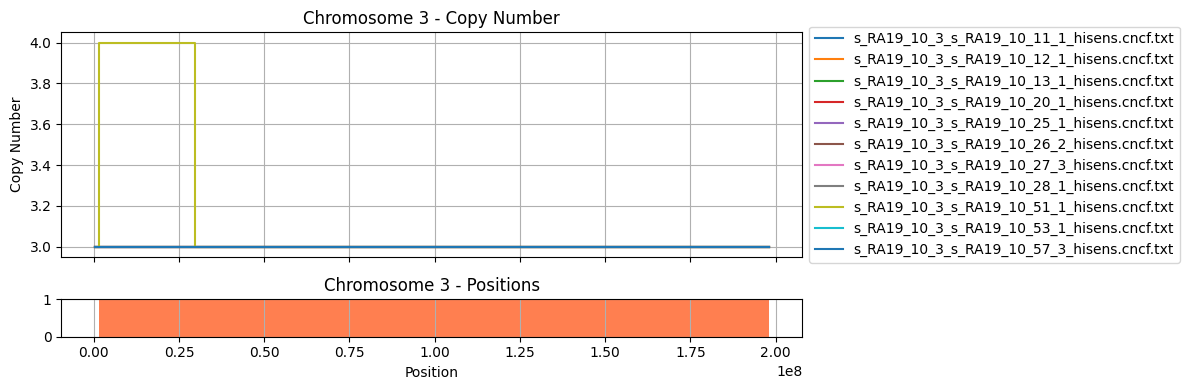

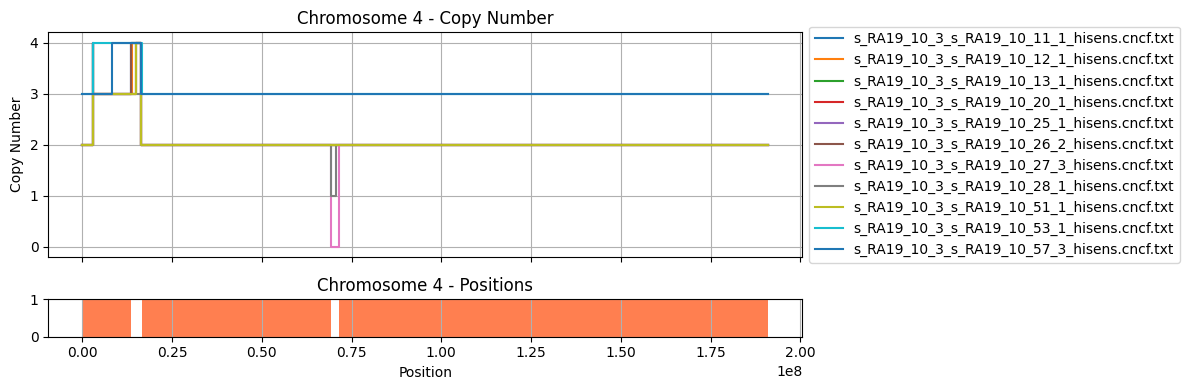

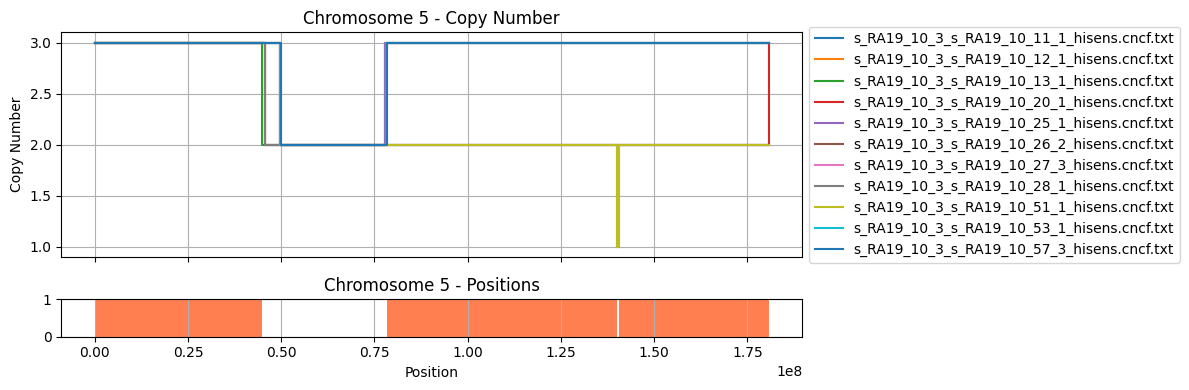

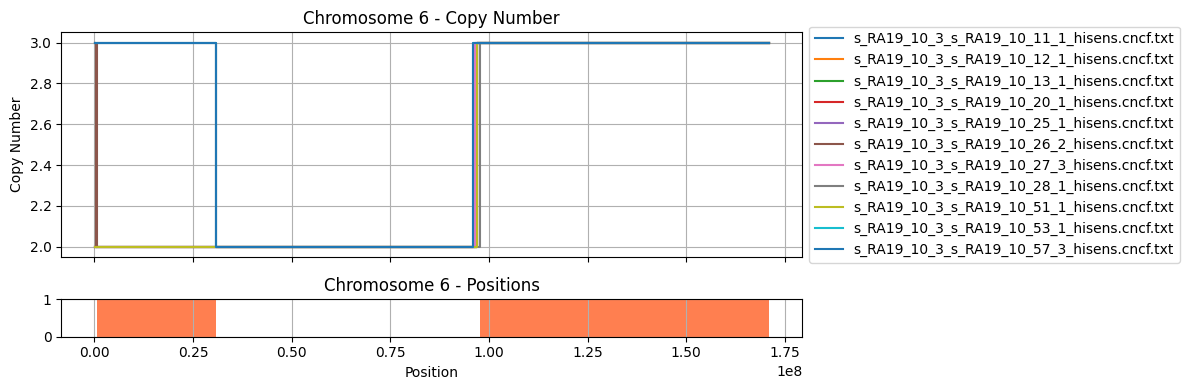

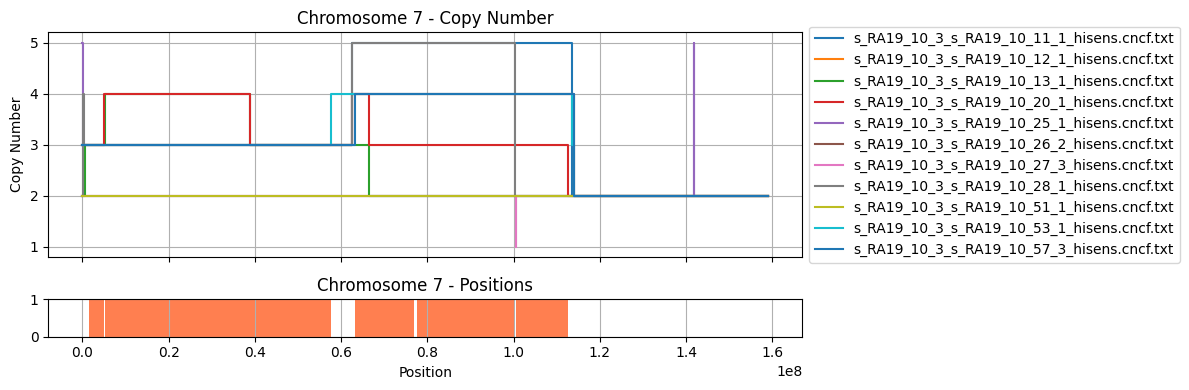

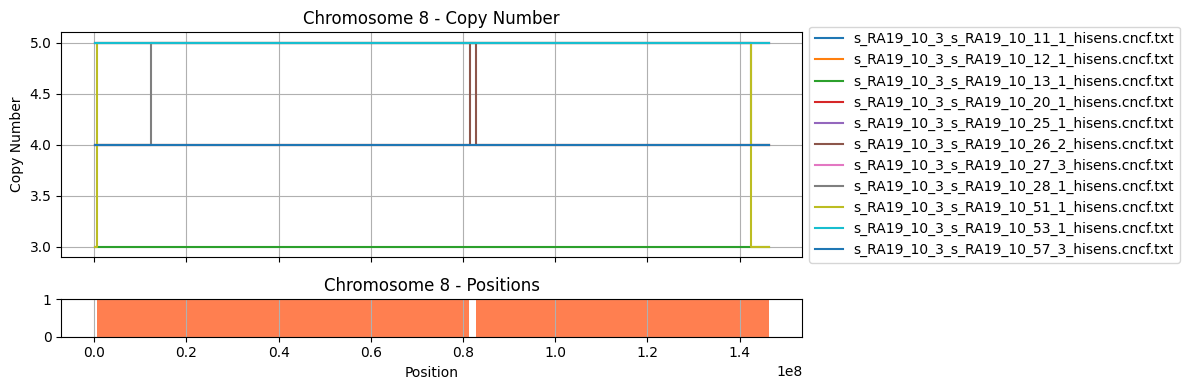

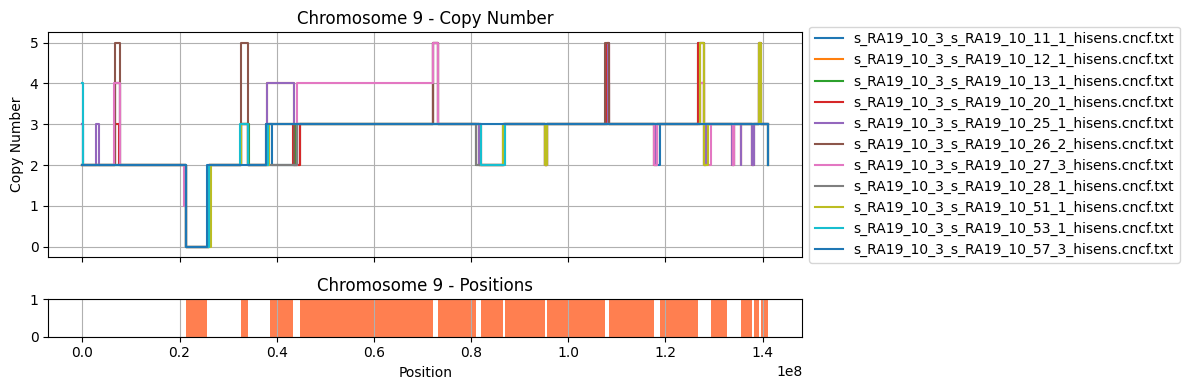

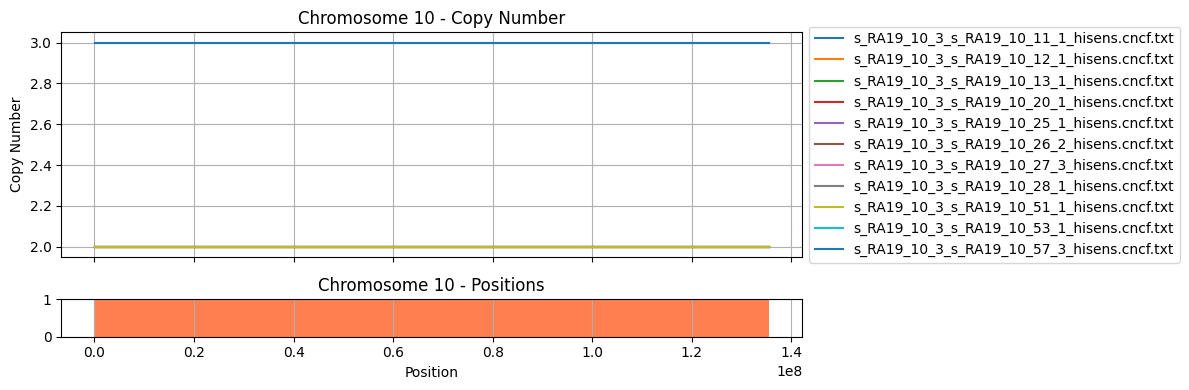

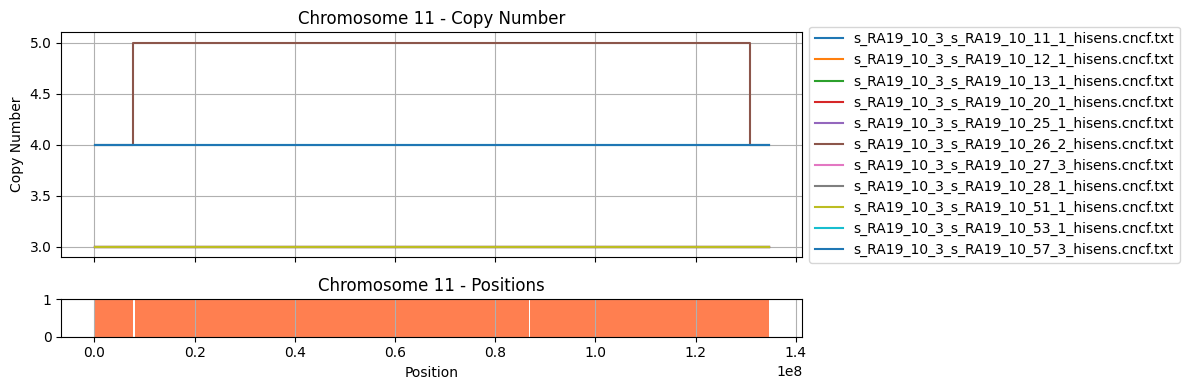

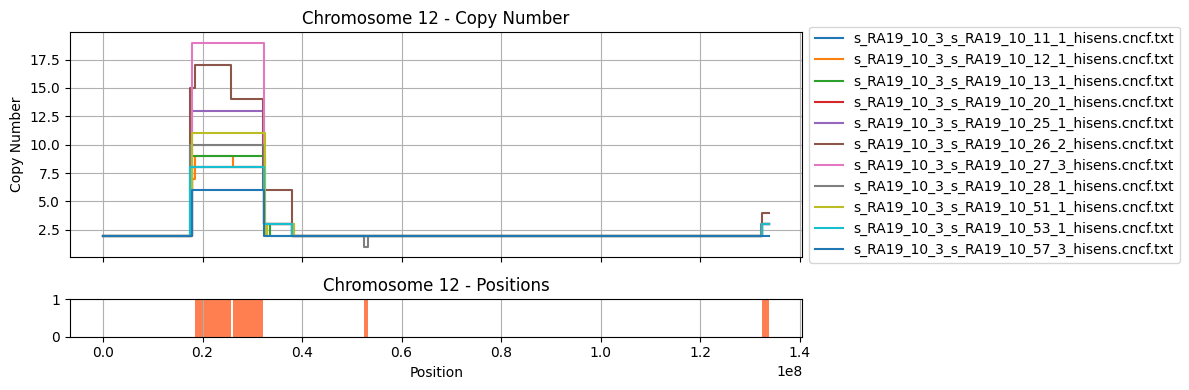

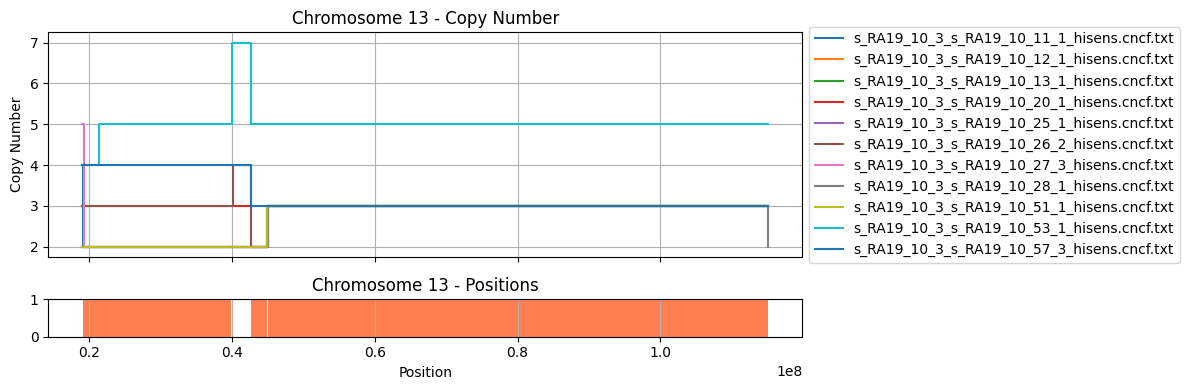

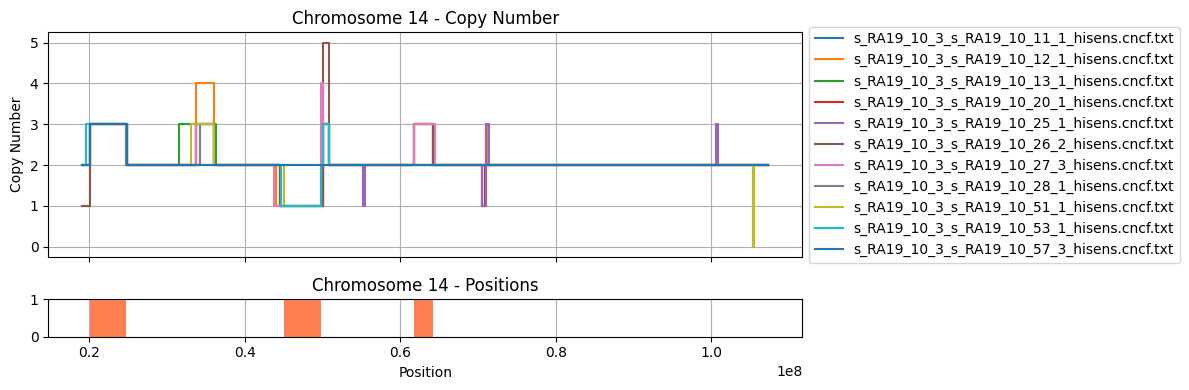

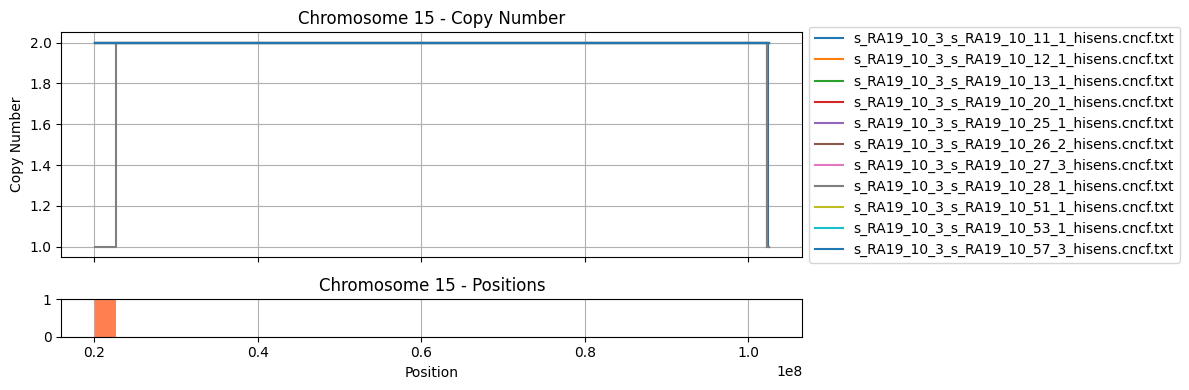

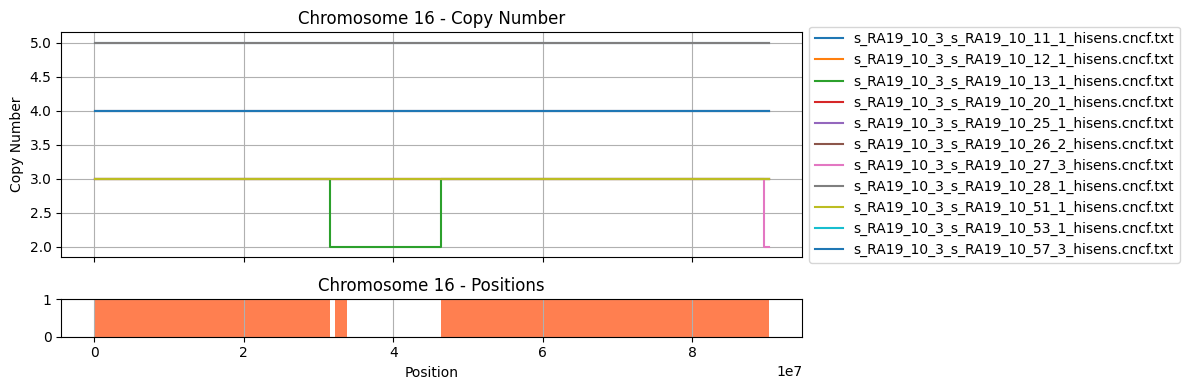

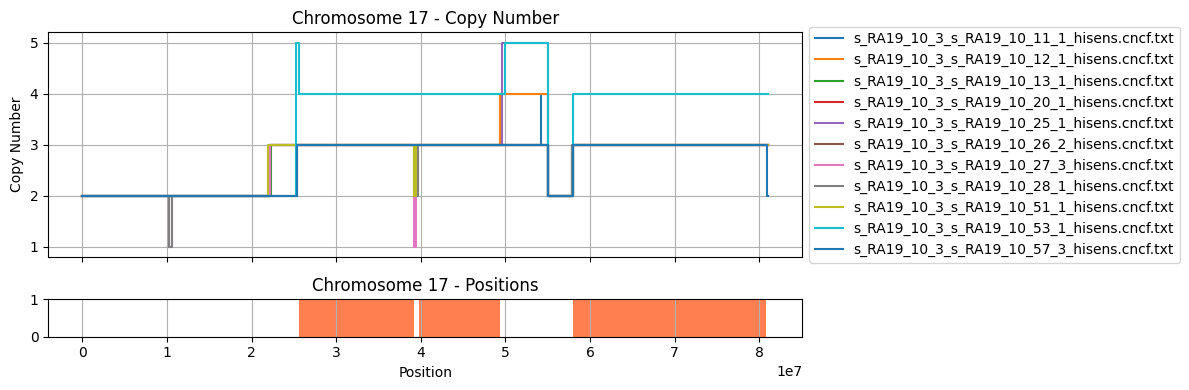

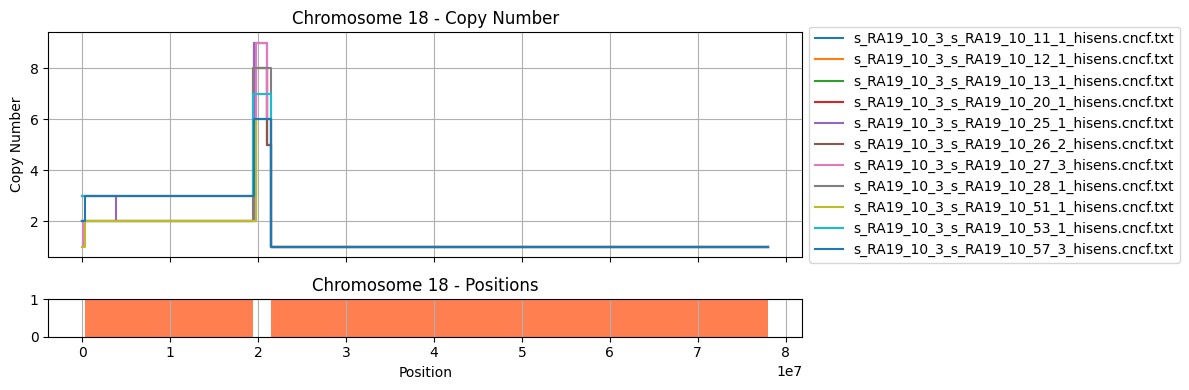

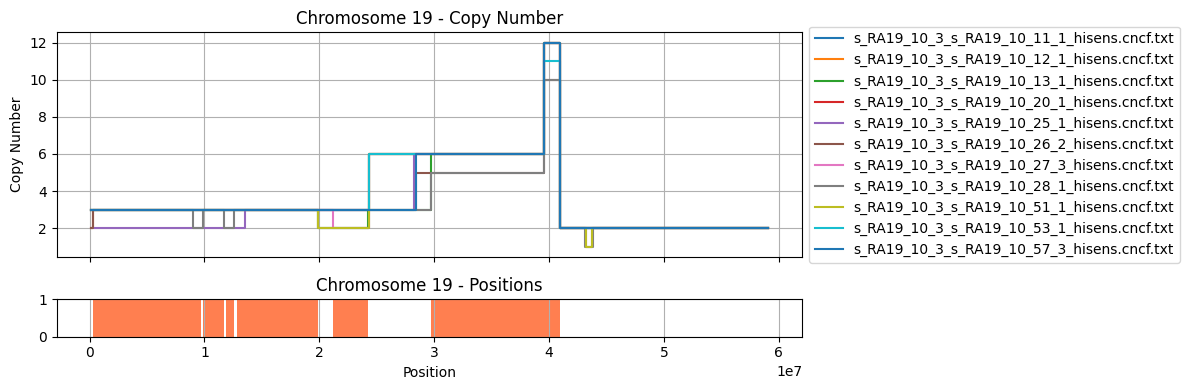

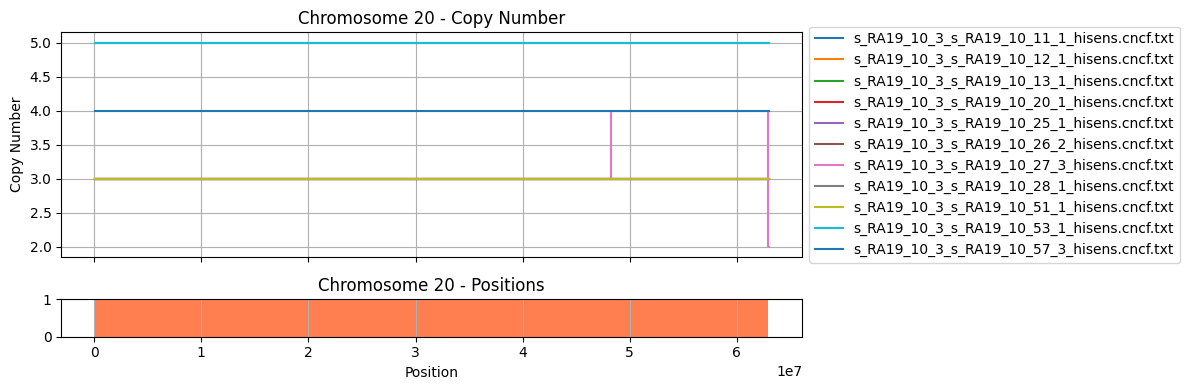

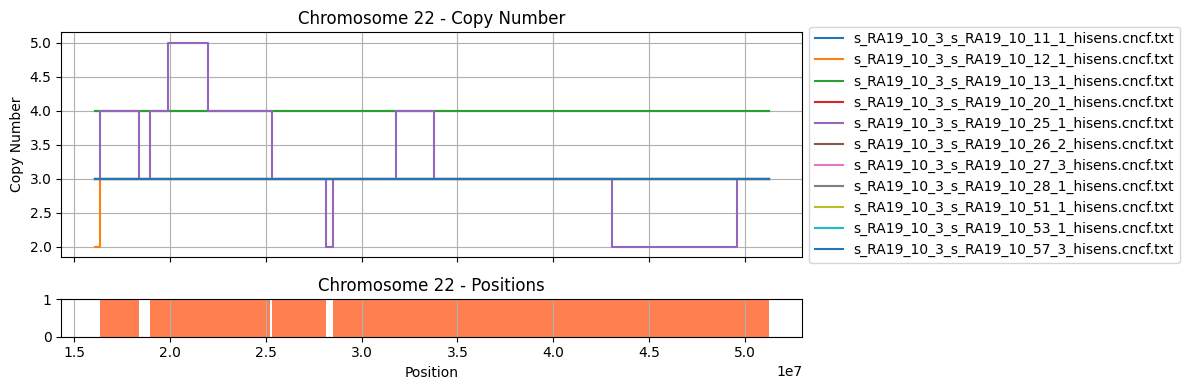

In [6]:
cnv.prepare_regions.plot_paired_cnv_regions(cna_paths, cna_alterations_bed_filtered, 'coral')

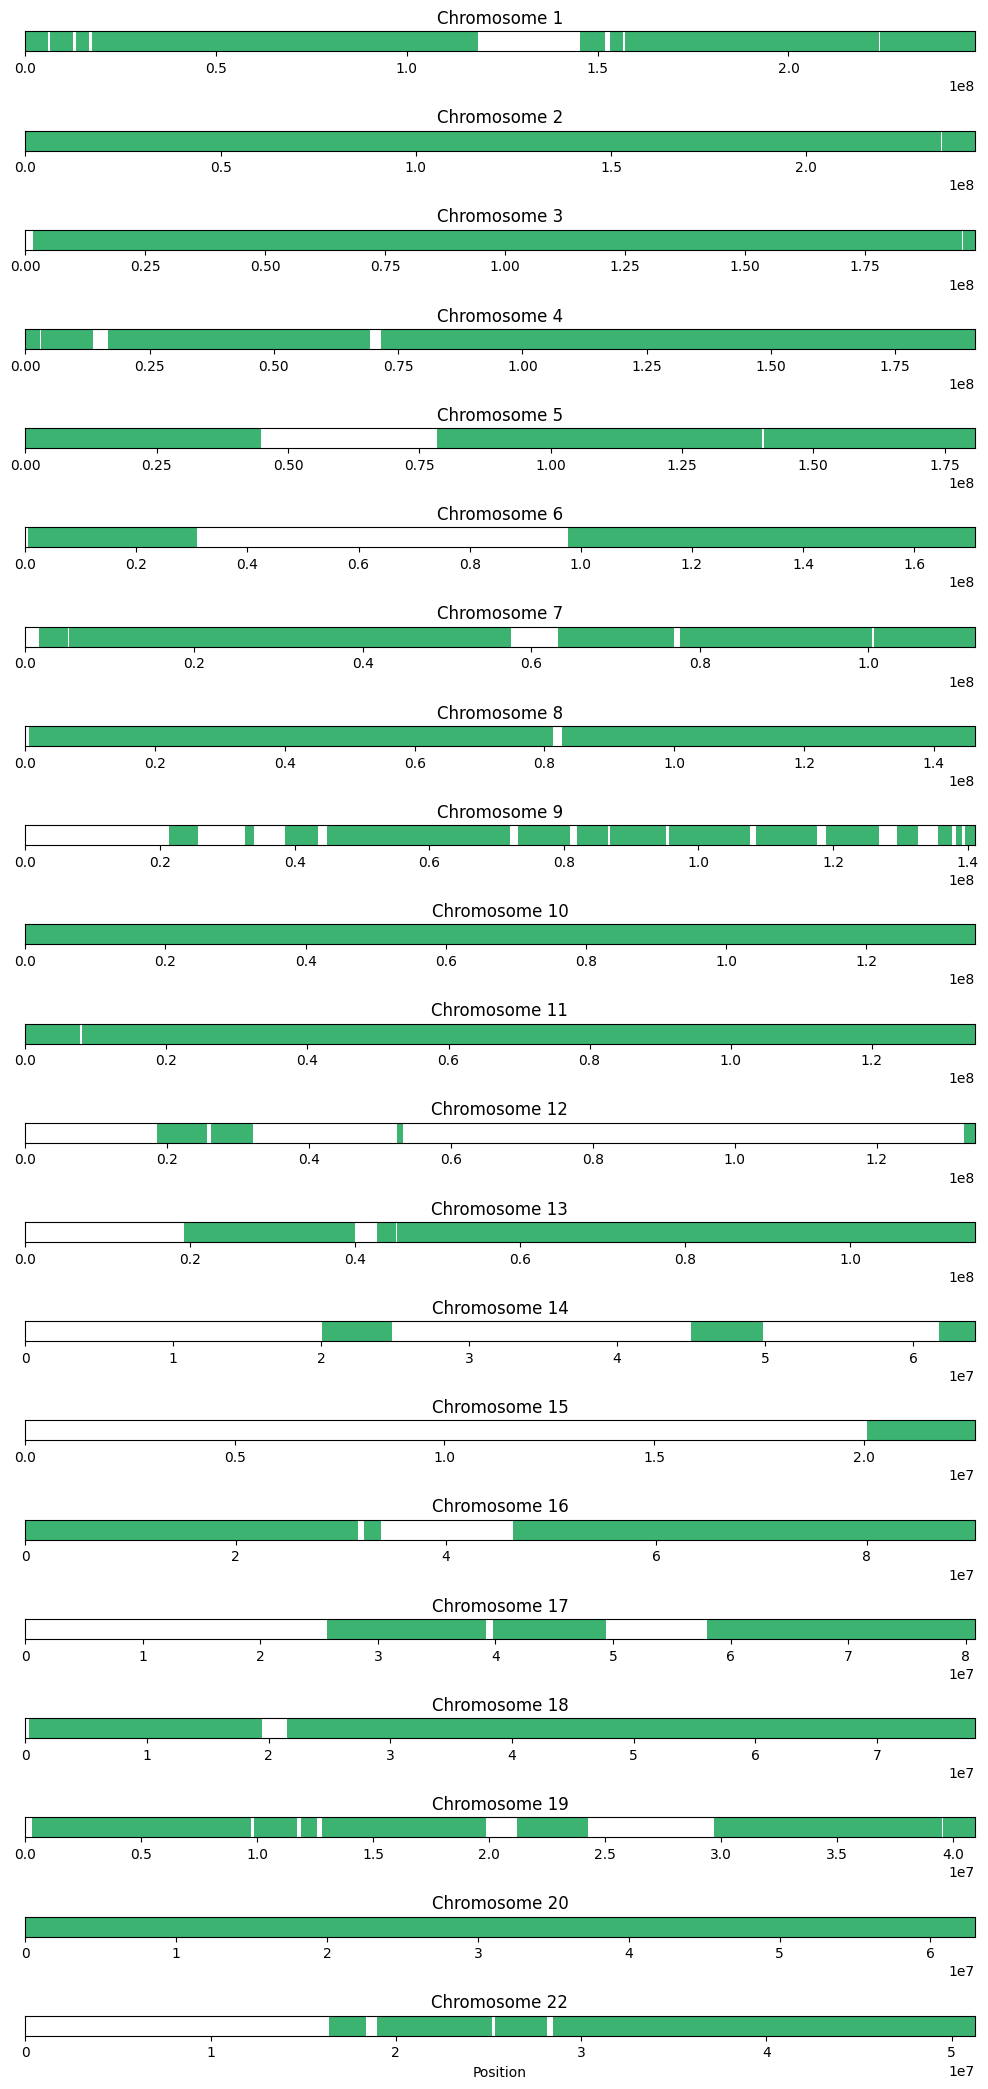

In [7]:
cnv.prepare_regions.plot_selected_regions(cna_alterations_bed_filtered, 'mediumseagreen')

In [9]:
# Determing regions that are neutral in all samples from WGS data
cna_neutral_bed = cnv.prepare_regions.get_neutral_regions(cna_paths)
n_neutral = cna_neutral_bed.shape[0]
print(f'Found {n_neutral} neutral regions.')

Found 9 neutral regions.


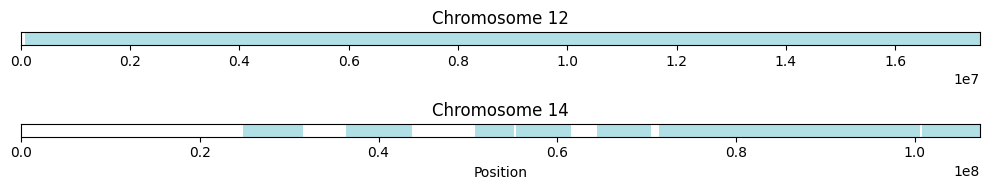

In [10]:
cnv.prepare_regions.plot_selected_regions(cna_neutral_bed, 'powderblue')

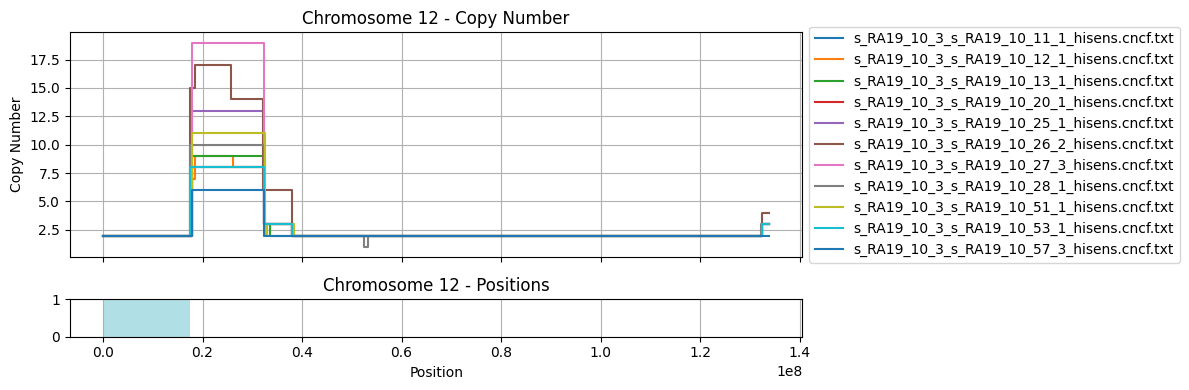

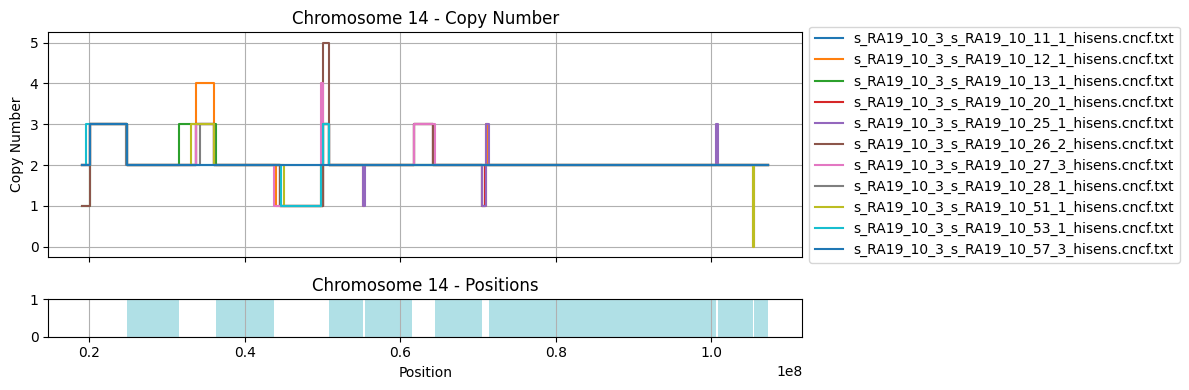

In [11]:
cnv.prepare_regions.plot_paired_cnv_regions(cna_paths, cna_neutral_bed, 'powderblue')

# Map genes to regions

In [14]:
# Get genes that fall in altered and neutral regions  
cna_gene_map_alt = cnv.prepare_regions.map_gene_to_cna(cna_alterations_bed_filtered, gene_annot_tab)
cna_gene_map_nm = cnv.prepare_regions.map_gene_to_cna(cna_neutral_bed, gene_annot_tab)


In [19]:
cna_gene_map_alt[['chr', 'start', 'end', 'gene_name']].head()

,chr,start,end,gene_name
0,chr1,131500,5928100,RP11-34P13.9
1,chr1,131500,5928100,OR4F16
2,chr1,131500,5928100,LINC00115
3,chr1,131500,5928100,FAM41C
4,chr1,131500,5928100,RP11-54O7.16


# Load sc-RNA seq

In [27]:
ad = cnv.load_data()
# We want to make sure we are using raw counts; we want to normalize only against neutral regions
ad.layers['counts'] = ad.X.copy()
normal_celltypes = ["lymphocyte","endothelial","fibroblast","macrophage", "normal"]

assert 'celltype' in ad.obs, 'Celltype annotation not found in AnnData object. Please ensure your celltype annotations are stored in the .obs attribute.'

normal_cells = ad.obs_names[ad.obs['celltype'].isin(normal_celltypes)]

print(f'Loaded RNA-seq data with {ad.n_vars} genes and {ad.n_obs} cells ({len(normal_cells)} normal cells).')

Loaded RNA-seq data with 25523 genes and 1000 cells (397 normal cells).


In [28]:
assert 'counts' in ad.layers, 'Counts layer not found in AnnData object. Please ensure your counts are stored in the .layers attribute.'
counts = ad.to_df(layer='counts')

(1000, 25523)

In [29]:
# Filter lowly expressed genes 
counts = cnv.score.filter_low_genes(counts, exp_cells=10)

(1000, 13209)

In [31]:
# This step may be time-consuming; be sure the save the filtered counts to a file for future use
counts_in_altered_regions = cnv.score.aggregate_genes_over_regions(cna_gene_map_alt, 
                                                         counts, 
                                                         pseudocount=0.01,
                                                         verbose=True)

Found 9742 genes in both the count matrix (13209) and the CNA gene map (19958).
Final count matrix shape contains 1000 cells and 115 regions.


In [41]:
# We ignore the differences across neutral regions for now and aggregate across all neutral regions
cna_gene_map_all_neutral = cna_gene_map_nm.copy()
cna_gene_map_all_neutral['chr'] = 'chr00'
cna_gene_map_all_neutral['start'] = 'neutral'
cna_gene_map_all_neutral['end'] = 'neutral'

counts_in_neutral_regions = cnv.score.aggregate_genes_over_regions(cna_gene_map_all_neutral,
                                                            counts,
                                                            pseudocount=0.01,
                                                            verbose=True)

Found 440 genes in both the count matrix (13209) and the CNA gene map (990).
Final count matrix shape contains 1000 cells and 1 regions.


In [42]:
ratio_log_normed = cnv.score.lognorm_counts(counts_in_altered_regions, counts_in_neutral_regions)
null_mean, null_std = cnv.score.get_parameters(ratio_log_normed, normal_cells, verbose=True)

Using 397 normal cells to compute the null mean and standard deviation for each region.
Computing loglikelihood for each cell and region under the null reference/normal distributions.


In [43]:
# Compute the loglikelihood for each cell and region under the null reference/normal distributions
lls, z_scores = cnv.score.score_cnas(ratio_log_normed, null_mean, null_std)
    
# Do the lls contain any NaNs?
if lls.isnull().sum().sum() > 0:
    print('Warning: lls contains NaNs.')

In [45]:
# Alternatively, you may run the entire pipeline in one go
lls, z_scores = cnv.score.run_integrateCNV(ad, normal_celltypes, cna_gene_map_alt, cna_gene_map_nm)

Loaded RNA-seq data with 25523 genes and 1000 cells (397 normal cells).
Found 9742 genes in both the count matrix (13209) and the CNA gene map (19958).
Final count matrix shape contains 1000 cells and 115 regions.
Found 440 genes in both the count matrix (13209) and the CNA gene map (990).
Final count matrix shape contains 1000 cells and 1 regions.
Using 397 normal cells to compute the null mean and standard deviation for each region.
Computing loglikelihood for each cell and region under the null reference/normal distributions.
